<h1 align="center">Mathematical Methods in Engineering - Course Code: 25872</h1>
<h3 align="center">Instructor: Dr. Pilaram</h3>
<h4 align="center">Sharif University of Technology</h4>
<h4 align="center">Computer Assignment 2</h4>

<p align="center">For any questions, please contact <a href="https://t.me/imanf82">Iman Fakury</a>.</p>


# **Problem 1: Regression** ``(20 pt.)``
## 1.1 Linear Regression

---
Follow this steps:

1. Write function `generate_linear_data` that generates  sample points $(x_i, y_i)$ where $$y_i = ax_i + b + \epsilon_i$$ $\epsilon_i$ is an error term (measurement error etc.) added to $y_i$ and is modeled by random variables: $\epsilon_i \stackrel{iid}{\sim} \mathcal{N}(0, 1) $
2. Fit a line using least square method that you learned during the course.
3. Evaluate the accuracy of your fit using `Mean Squared Error (MSE)` and `R² score`.
4. Create a scatter plot of the sample data alongside the fitted line.


Note that you shouldn't use any built-in function form np.linalg library.


Estimated slope: 1.996, intercept: 5.143
R² score: 0.995, MSE: 0.703


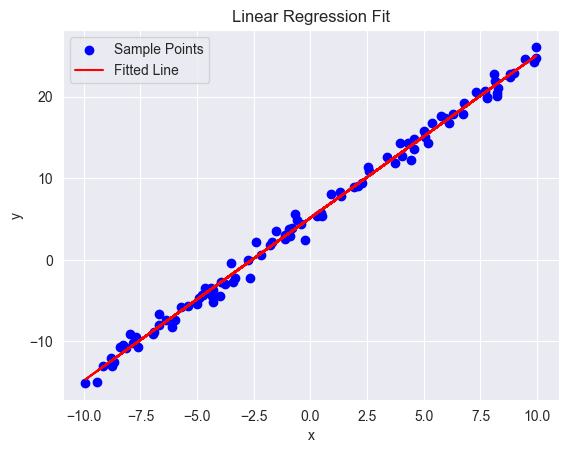

In [1]:
import numpy as np



def generate_linear_data(slope, intercept, num_points=100, noise_std=1.0):
    x = np.random.uniform(-10, 10, num_points)

    epsilon = np.random.normal(0, noise_std, num_points)

    y = slope * x + intercept + epsilon

    return x, y

def fit_line(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean)**2)

    slope = numerator / denominator
    intercept = y_mean - slope * x_mean

    return slope, intercept


def evaluate_fit(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)

    y_mean = np.mean(y_true)
    ss_tot = np.sum((y_true - y_mean)**2)
    ss_res = np.sum((y_true - y_pred)**2)

    r2 = 1 - (ss_res / ss_tot)

    return r2, mse

import matplotlib.pyplot as plt

x, y = generate_linear_data(slope=2, intercept=5, num_points=100, noise_std=1.0)

slope_hat, intercept_hat = fit_line(x, y)

y_pred = slope_hat * x + intercept_hat

r2, mse = evaluate_fit(y, y_pred)
print(f"Estimated slope: {slope_hat:.3f}, intercept: {intercept_hat:.3f}")
print(f"R² score: {r2:.3f}, MSE: {mse:.3f}")

plt.scatter(x, y, color='blue', label='Sample Points')
plt.plot(x, y_pred, color='red', label='Fitted Line')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")
plt.grid(True)
plt.show()


# Plot the sample points and  the fitted line alongside each other.

## 1.2 Polynomial Regression
Implement all the steps from the previous part in this section.

Estimated coefficients: [ 0.50555532 -2.03882912  3.00263436]
R² score: 0.999, MSE: 4.068


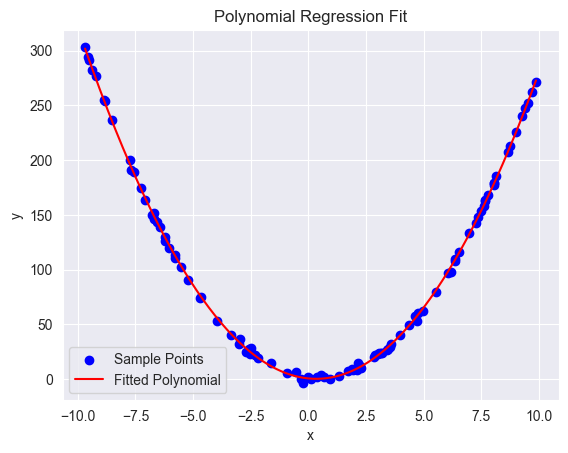

In [2]:
def generate_polynomial_data(coeffs, num_points=100, noise_std=1.0):
    x = np.random.uniform(-10, 10, num_points)

    y = np.zeros_like(x)
    for power, coef in enumerate(coeffs):
        y += coef * (x ** power)

    noise = np.random.normal(0, noise_std, num_points)
    y += noise

    return x, y

def fit_polynomial(x, y, degree):
    n = len(x)

    X = np.vstack([x**i for i in range(degree + 1)]).T

    XT_X = X.T @ X
    XT_y = X.T @ y

    coeffs = np.linalg.inv(XT_X) @ XT_y

    return coeffs
def predict_polynomial(x, coeffs):
    y_pred = np.zeros_like(x)
    for power, coef in enumerate(coeffs):
        y_pred += coef * x**power
    return y_pred
coeffs_true = [1, -2, 3]
x, y = generate_polynomial_data(coeffs_true, num_points=100, noise_std=2.0)

coeffs_hat = fit_polynomial(x, y, degree=2)

y_pred = predict_polynomial(x, coeffs_hat)

r2, mse = evaluate_fit(y, y_pred)
print(f"Estimated coefficients: {coeffs_hat}")
print(f"R² score: {r2:.3f}, MSE: {mse:.3f}")

x_plot = np.linspace(np.min(x), np.max(x), 300)
y_plot = predict_polynomial(x_plot, coeffs_hat)

plt.scatter(x, y, color='blue', label='Sample Points')
plt.plot(x_plot, y_plot, color='red', label='Fitted Polynomial')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression Fit")
plt.grid(True)
plt.show()


# Plot the sample points and  the fitted polynomial alongside each other.

# **Problem 2: SVD for Compression** ``(30 pt.)``

---

In this question, we want to compress BMP images using SVD. BMP images are not compressed by default and the pixel information is stored in rather a simple format. Colored BMP files are composed of three matrices of size $n × m$ where $n$ and $m$ are the height and width of the image, respectively. Each matrix corresponds to one of the three colors Red, Green, and Blue. Each entry of these matrices is a number between 0 and 255 that specifies the intensity of the corresponding color. The final array is hence a 3D array of size $n × m × 3$.

---

### 2.1 Image display
Choose two arbitrary BMP files (it is recommended to use different subjects and sizes) and load it into a `numpy` array using the `imread` function. Then, show each image and display their shape.

Dimensions of Image A: (460, 640, 3)
Dimensions of Image B: (426, 640, 3)


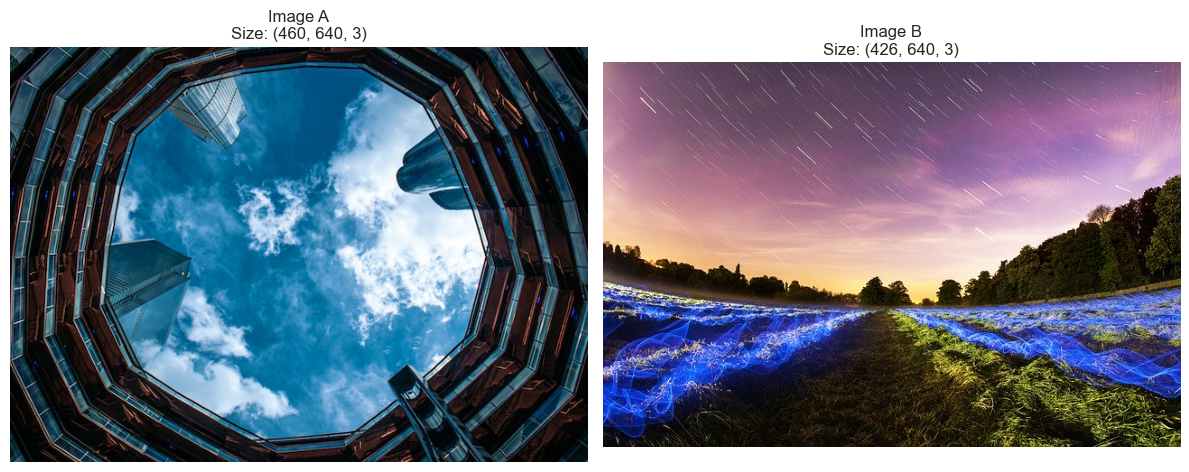

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

img_a = imread("1.bmp")
img_b = imread("2.bmp")

print(f"Dimensions of Image A: {img_a.shape}")
print(f"Dimensions of Image B: {img_b.shape}")

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img_a)
ax1.set_title(f"Image A\nSize: {img_a.shape}")
ax1.axis('off')

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(img_b)
ax2.set_title(f"Image B\nSize: {img_b.shape}")
ax2.axis('off')

plt.tight_layout()
plt.show()


### 2.2 Singular Value Decomposition and channel seperation

Calculate the SVD decomposition of each of ech RGB channel.

$$
A = U \Sigma V^T
$$
where $A$ is the original array, $U$ is an $n × n$ unitary matrix, $\Sigma$ is an $n × m$ rectangular diagonal matrix with non-negative real numbers on the diagonal, and $V$ is an $m × m$ unitary matrix.

In [4]:
import numpy as np
from matplotlib.image import imread

def extract_svd_components(img_path_a, img_path_b):
    img_a = imread(img_path_a).astype(float)
    img_b = imread(img_path_b).astype(float)

    # Split channels for image A
    red_a, green_a, blue_a = img_a[:, :, 0], img_a[:, :, 1], img_a[:, :, 2]
    u_r_a, s_r_a, vt_r_a = np.linalg.svd(red_a, full_matrices=False)
    u_g_a, s_g_a, vt_g_a = np.linalg.svd(green_a, full_matrices=False)
    u_b_a, s_b_a, vt_b_a = np.linalg.svd(blue_a, full_matrices=False)

    # Split channels for image B
    red_b, green_b, blue_b = img_b[:, :, 0], img_b[:, :, 1], img_b[:, :, 2]
    u_r_b, s_r_b, vt_r_b = np.linalg.svd(red_b, full_matrices=False)
    u_g_b, s_g_b, vt_g_b = np.linalg.svd(green_b, full_matrices=False)
    u_b_b, s_b_b, vt_b_b = np.linalg.svd(blue_b, full_matrices=False)

    return {
        "img_a": {
            "R": (u_r_a, s_r_a, vt_r_a),
            "G": (u_g_a, s_g_a, vt_g_a),
            "B": (u_b_a, s_b_a, vt_b_a),
        },
        "img_b": {
            "R": (u_r_b, s_r_b, vt_r_b),
            "G": (u_g_b, s_g_b, vt_g_b),
            "B": (u_b_b, s_b_b, vt_b_b),
        },
    }

### 2.3 compressing the image

Since eigenvalues in the decomposition are sorted in descending order, we can approximate the original array by keeping only the first $k$ columns of $U$, first $k$ rows and columns of $\Sigma$, and first $k$ rows of $V^T$.
Select $k$ to be (5, 10, 20, 30, 50, 100, 200, 250) and approximate the original array using the truncated SVD. Show the approximated image titled with the value of $k$.

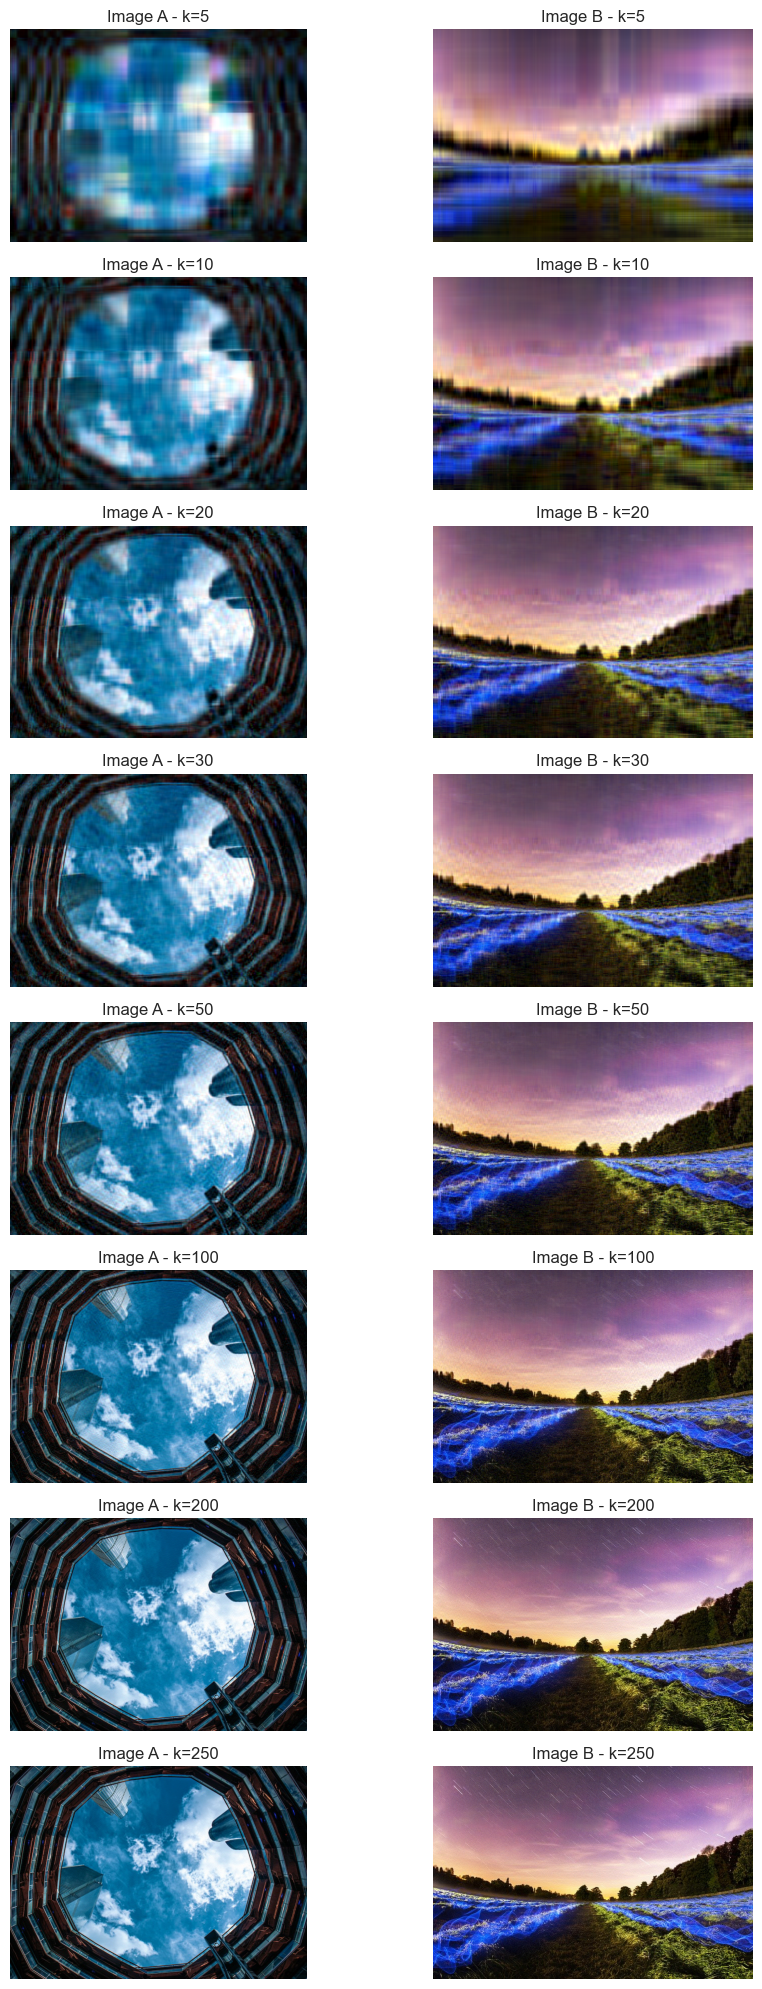

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np

def decompose_rgb_channels(img_path):
    img = imread(img_path).astype(float)
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    return {
        "R": np.linalg.svd(r, full_matrices=False),
        "G": np.linalg.svd(g, full_matrices=False),
        "B": np.linalg.svd(b, full_matrices=False),
    }

def approximate_channel(u, s, vt, rank):
    s_truncated = np.diag(s[:rank])
    return u[:, :rank] @ s_truncated @ vt[:rank, :]

def build_compressed_image(svd_data, rank):
    r_comp = approximate_channel(*svd_data["R"], rank)
    g_comp = approximate_channel(*svd_data["G"], rank)
    b_comp = approximate_channel(*svd_data["B"], rank)
    compressed_img = np.stack([r_comp, g_comp, b_comp], axis=-1)
    return np.clip(compressed_img, 0, 255).astype(np.uint8)

path_a = "1.bmp"
path_b = "2.bmp"
ranks = [5, 10, 20, 30, 50, 100, 200, 250]

svd_a = decompose_rgb_channels(path_a)
svd_b = decompose_rgb_channels(path_b)

fig, ax_arr = plt.subplots(len(ranks), 2, figsize=(10, 2.5 * len(ranks)))

for idx, rk in enumerate(ranks):
    img_a = build_compressed_image(svd_a, rk)
    img_b = build_compressed_image(svd_b, rk)

    ax_arr[idx, 0].imshow(img_a)
    ax_arr[idx, 0].set_title(f"Image A - k={rk}")
    ax_arr[idx, 0].axis('off')

    ax_arr[idx, 1].imshow(img_b)
    ax_arr[idx, 1].set_title(f"Image B - k={rk}")
    ax_arr[idx, 1].axis('off')

plt.tight_layout()
plt.show()

#### Explain your results.

Explain the relationship between the number of components and the level of compression in the images. How does the image quality change with increasing values of k?

### 2.4 variance

There is no need to store $U$ and $V$ matrices. Instead, we can store $\Sigma$ and two other matrices of size $n × k$ and $m × k$. Using $\Sigma$ display the plots below. To not compress the image based on a given random number k, we are required to do some math & statistics

1. The plot "Component Importance" shows the  amount  of variance each component carries. The first component preserves the highest variance, then the second, and so on.
2. The plot shows the explained variance as a function of numbers, using this technique you can choose how much the image, relative to its original size gets compressed.

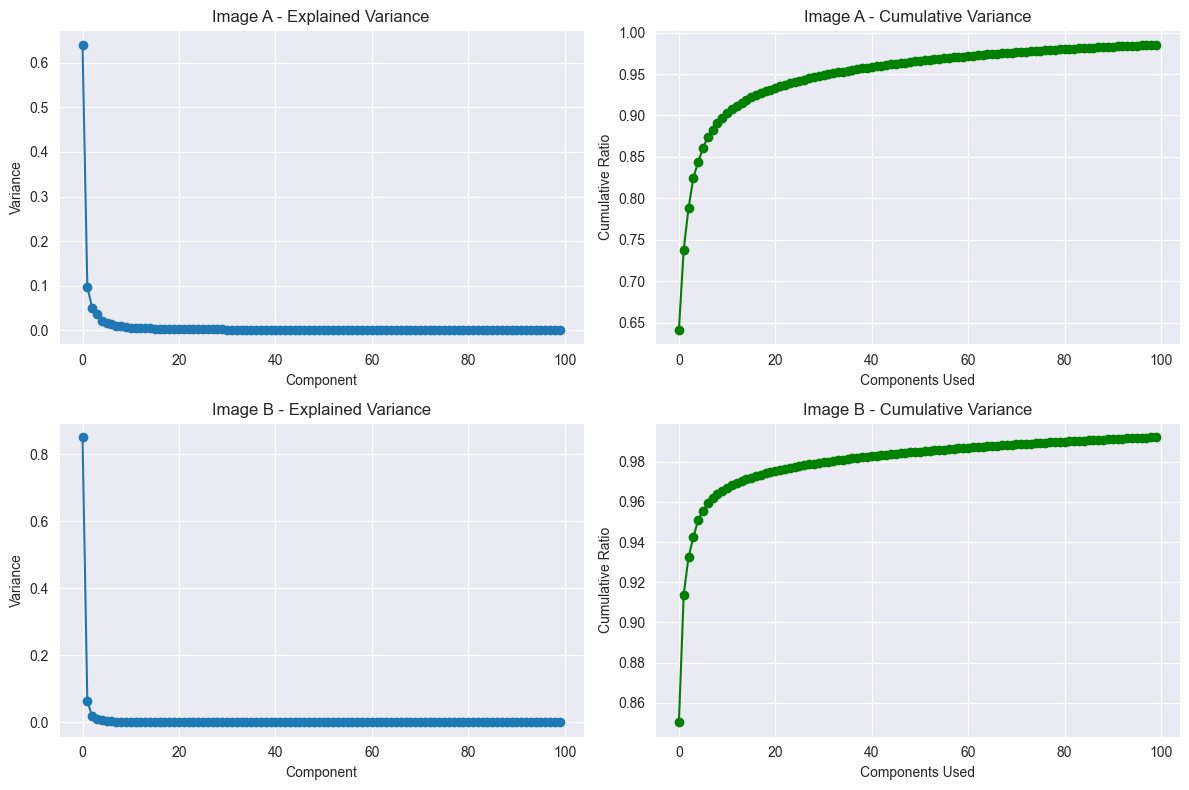

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

def get_svd_by_channel(path):
    img = imread(path).astype(float)
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    return {
        "R": np.linalg.svd(r, full_matrices=False),
        "G": np.linalg.svd(g, full_matrices=False),
        "B": np.linalg.svd(b, full_matrices=False),
    }

def calculate_variance_ratios(singular_vals):
    sq_vals = singular_vals**2
    total_energy = np.sum(sq_vals)
    explained_ratio = sq_vals / total_energy
    cumulative_ratio = np.cumsum(explained_ratio)
    return explained_ratio, cumulative_ratio

svd_a = get_svd_by_channel("1.bmp")
svd_b = get_svd_by_channel("2.bmp")

singular_a = svd_a["R"][1]
singular_b = svd_b["R"][1]

explained_a, cumulative_a = calculate_variance_ratios(singular_a)
explained_b, cumulative_b = calculate_variance_ratios(singular_b)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# First image plots
axs[0, 0].plot(explained_a[:100], marker='o')
axs[0, 0].set_title("Image A - Explained Variance")
axs[0, 0].set_xlabel("Component")
axs[0, 0].set_ylabel("Variance")
axs[0, 0].grid(True)

axs[0, 1].plot(cumulative_a[:100], marker='o', color='green')
axs[0, 1].set_title("Image A - Cumulative Variance")
axs[0, 1].set_xlabel("Components Used")
axs[0, 1].set_ylabel("Cumulative Ratio")
axs[0, 1].grid(True)

# Second image plots
axs[1, 0].plot(explained_b[:100], marker='o')
axs[1, 0].set_title("Image B - Explained Variance")
axs[1, 0].set_xlabel("Component")
axs[1, 0].set_ylabel("Variance")
axs[1, 0].grid(True)

axs[1, 1].plot(cumulative_b[:100], marker='o', color='green')
axs[1, 1].set_title("Image B - Cumulative Variance")
axs[1, 1].set_xlabel("Components Used")
axs[1, 1].set_ylabel("Cumulative Ratio")
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

Compress the image with 90% of its explained variance ratio and show the result image.

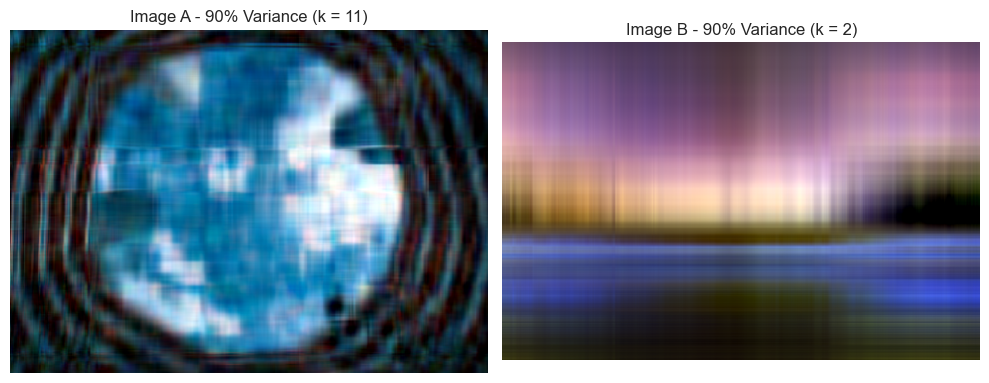

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

def svd_by_color_channels(path):
    img = imread(path).astype(float)
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    return {
        "R": np.linalg.svd(r, full_matrices=False),
        "G": np.linalg.svd(g, full_matrices=False),
        "B": np.linalg.svd(b, full_matrices=False),
    }

def compute_cumulative_variance(singular_vals):
    energy = singular_vals**2
    total = np.sum(energy)
    return np.cumsum(energy / total)

def find_min_k(cumulative, target_ratio=0.9):
    return np.argmax(cumulative >= target_ratio) + 1

def reconstruct_image(svd_components, rank):
    def channel_reconstruct(u, s, vt):
        s_trunc = np.diag(s[:rank])
        return u[:, :rank] @ s_trunc @ vt[:rank, :]

    r_recon = channel_reconstruct(*svd_components["R"])
    g_recon = channel_reconstruct(*svd_components["G"])
    b_recon = channel_reconstruct(*svd_components["B"])
    image = np.stack([r_recon, g_recon, b_recon], axis=-1)
    return np.clip(image, 0, 255).astype(np.uint8)

img_path_a = "1.bmp"
img_path_b = "2.bmp"

svd_a = svd_by_color_channels(img_path_a)
svd_b = svd_by_color_channels(img_path_b)

cum_a = compute_cumulative_variance(svd_a["R"][1])
cum_b = compute_cumulative_variance(svd_b["R"][1])

k_a = find_min_k(cum_a, 0.9)
k_b = find_min_k(cum_b, 0.9)

img_a_compressed = reconstruct_image(svd_a, k_a)
img_b_compressed = reconstruct_image(svd_b, k_b)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_a_compressed)
plt.title(f"Image A - 90% Variance (k = {k_a})")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_b_compressed)
plt.title(f"Image B - 90% Variance (k = {k_b})")
plt.axis('off')

plt.tight_layout()
plt.show()

# **Problem 3: PCA and its applications** ``(50 pt.)``

---


Principal Component Analysis (PCA) is a statistical technique commonly used in data analysis and machine learning for dimensionality reduction while preserving as much variance as possible. It helps in identifying patterns in data based on the correlation between features. The goal of PCA is to reduce the number of variables of a data set, while preserving as much information (variance) as possible.

---

### Step 1: Standardize the Dataset
Normalize each feature in the dataset to have zero mean and unit variance to ensure each feature contributes equally:

\begin{align}
z_i = \frac{(x_i - \mu)}{\sigma}
\end{align}

### Step 2: Compute the Covariance Matrix
Construct a covariance matrix to analyze how features vary from the mean with respect to each other, which helps in identifying correlated features:

\begin{align}
C = \frac{1}{n-1} \times (X^T X)
\end{align}

where \( X \) is the standardized data matrix.

### Step 3: Calculate Eigenvalues and Eigenvectors
Solve for eigenvalues and their corresponding eigenvectors of the covariance matrix; these will determine the new axes (principal components) for the data projection:

\begin{align}
Cv = \lambda v
\end{align}

### Step 4: Sort Eigenvalues and Eigenvectors
Order the eigenvalues from largest to smallest and rank the eigenvectors accordingly. This ranking indicates the relative significance of each principal component.

### Step 5: Project Data onto Principal Components
Transform the original dataset into a new coordinate system by projecting it onto the principal eigenvectors, reducing dimensionality while retaining most of the variance:

\begin{align}
Y = XW
\end{align}

Here, \( W \) is the matrix containing the selected eigenvectors, and \( Y \) is the transformed data matrix. This final transformation results in a new dataset that highlights the most significant relationships within the original data.

---
In the section below, import all the libraries you need:

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.datasets import load_iris, fetch_openml
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, classification_report

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sb.__version__}")


NumPy version: 2.2.1
Pandas version: 2.2.3
Matplotlib version: 3.10.0
Seaborn version: 0.13.2


The MNIST dataset is a large collection of handwritten digits commonly used for training various image processing systems. It contains 70,000 images of handwritten digits from 0 to 9, each represented as a 28x28 pixel grayscale image.

load the dataset and show the first 50 samples:

In [8]:
#load the data set and fill nan value with 0
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

ModuleNotFoundError: No module named 'tensorflow'

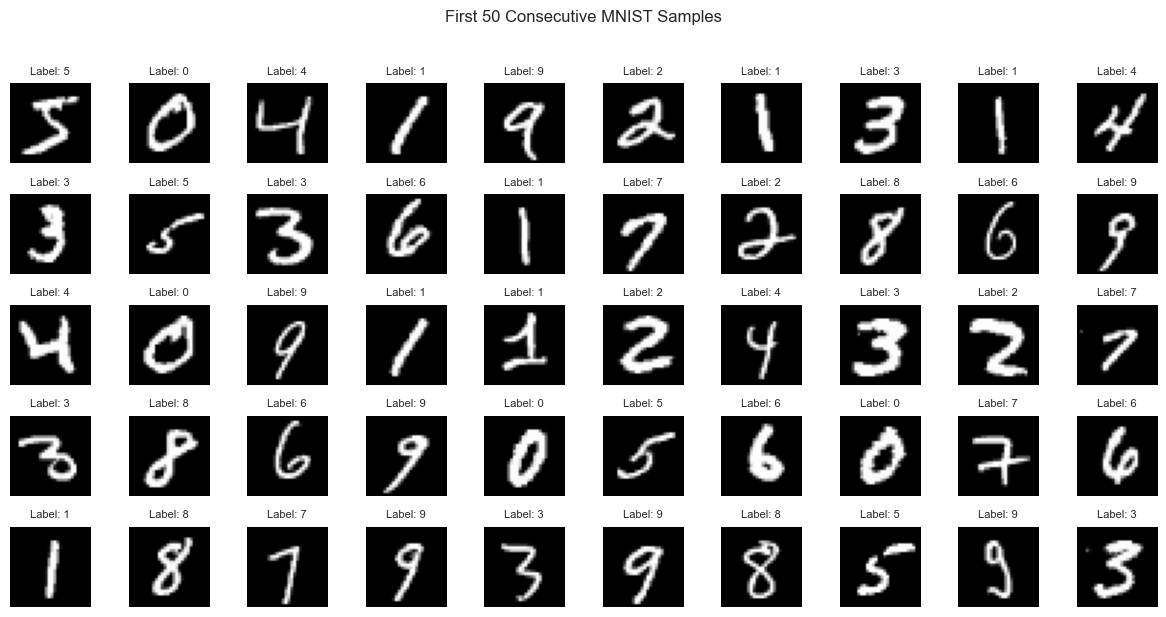

Total samples: 70000
First 50 samples shape: (50, 784)
Corresponding labels: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
x, y = mnist.data, mnist.target.astype(np.uint8)

x_first50 = x[:50]
y_first50 = y[:50]

x_images = x_first50.reshape(-1, 28, 28)

plt.figure(figsize=(12, 6))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(x_images[i], cmap='gray')
    plt.title(f"Label: {y_first50[i]}", fontsize=8)
    plt.axis('off')
plt.suptitle('First 50 Consecutive MNIST Samples', y=1.02)
plt.tight_layout()
plt.show()

print("Total samples:", len(x))
print("First 50 samples shape:", x_first50.shape)
print("Corresponding labels:", y_first50)

PCA is affected by scale, so you need to do some normalization on data before applying PCA.

1- Reshape the data from a 28x28 matrix to a flattened 784-element vector.

2- Subtract the mean and divide by the standard deviation for each sample.


Original shape: (10000, 784)
Flattened shape: (10000, 784)

Normalization verification:
Mean (should be ~0): [0. 0. 0. 0. 0.]
Std (should be ~1): [0. 0. 0. 0. 0.]


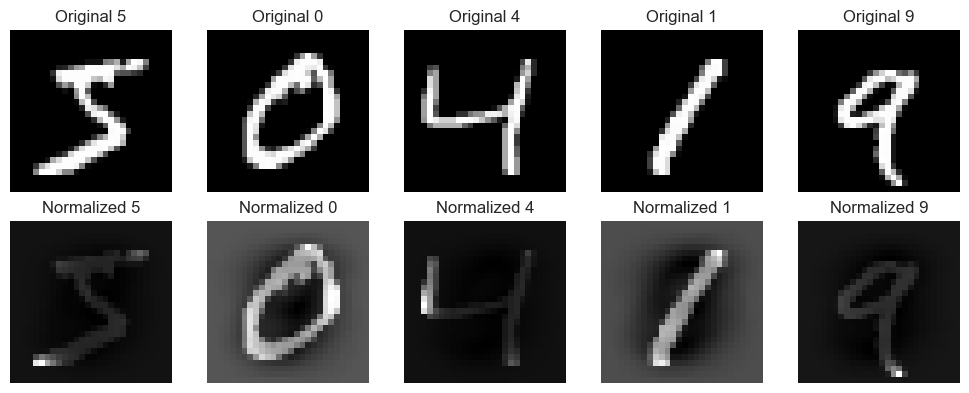

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist.data, mnist.target.astype(np.uint8)

X = X[:10000]
y = y[:10000]

X_flattened = X.reshape(X.shape[0], -1)

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_flattened)

print("Original shape:", X.shape)
print("Flattened shape:", X_flattened.shape)
print("\nNormalization verification:")
print("Mean (should be ~0):", np.mean(X_normalized, axis=0)[:5])
print("Std (should be ~1):", np.std(X_normalized, axis=0)[:5])

plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Original {y[i]}")
    plt.axis('off')

    plt.subplot(2, 5, i+6)
    plt.imshow(X_normalized[i].reshape(28, 28), cmap='gray')
    plt.title(f"Normalized {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In this section, first obtain the covariance matrix of the data and then extract its eigenvalues and eigenvectors. Finally, sort the eigenvalues and their corresponding eigenvectors from largest to smallest.

Top 5 eigenvalues: [41.48764824+0.j 29.38775657+0.j 27.23079609+0.j 20.77667703+0.j
 18.20599965+0.j]
Eigenvectors shape: (784, 784)

Sklearn PCA eigenvalues: [41.48764824 29.38775657 27.23079609 20.77667703 18.20599965]


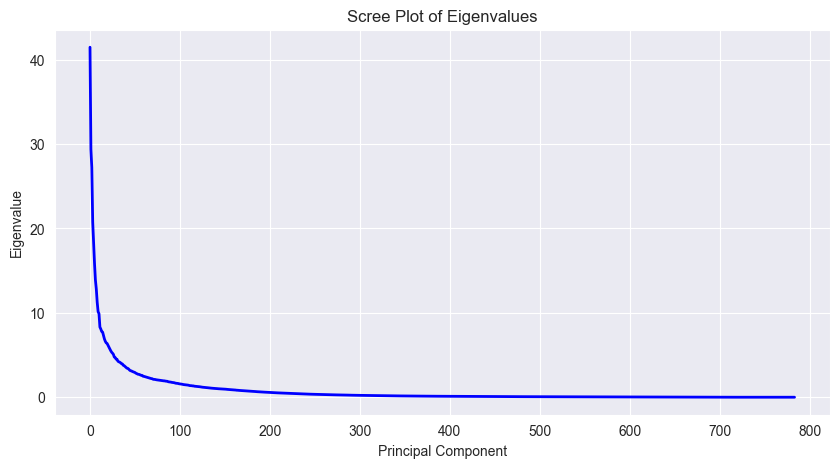

In [21]:
import numpy as np
from sklearn.decomposition import PCA

cov_matrix = np.dot(X_normalized.T, X_normalized) / (X_normalized.shape[0] - 1)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

print("Top 5 eigenvalues:", eigenvalues_sorted[:5])
print("Eigenvectors shape:", eigenvectors_sorted.shape)

pca = PCA()
pca.fit(X_normalized)
print("\nSklearn PCA eigenvalues:", pca.explained_variance_[:5])

plt.figure(figsize=(10, 5))
plt.plot(eigenvalues_sorted, 'b-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot of Eigenvalues')
plt.grid(True)
plt.show()

Now, we want to examine how many components can represent 75 percent of the total variance of the data. Note that the variance of each component corresponds to its eigenvalue.

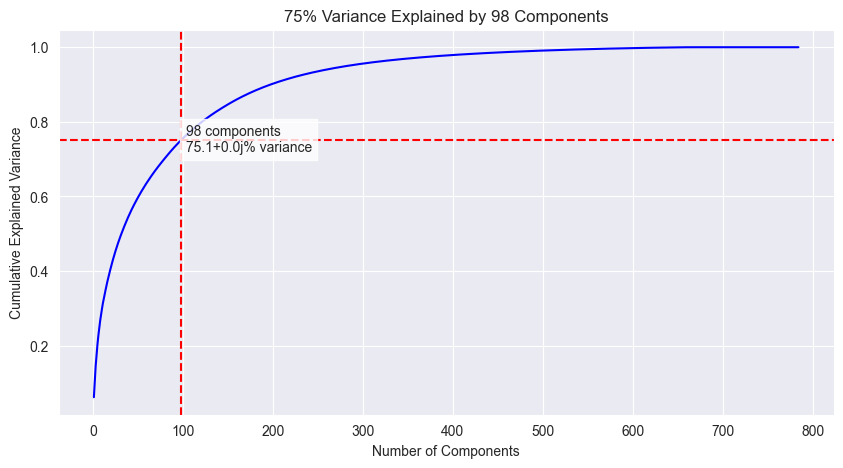

Number of components for 75% variance: 98
Variance explained: 75.12+0.00j%


In [22]:
import numpy as np
import matplotlib.pyplot as plt

total_variance = np.sum(eigenvalues_sorted)
explained_variance_ratio = eigenvalues_sorted / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio)

n_components_75 = np.argmax(cumulative_variance >= 0.75) + 1

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'b-')
plt.axhline(y=0.75, color='r', linestyle='--')
plt.axvline(x=n_components_75, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title(f'75% Variance Explained by {n_components_75} Components')
plt.grid(True)

plt.text(n_components_75+5, 0.72,
         f'{n_components_75} components\n{100*cumulative_variance[n_components_75-1]:.1f}% variance',
         bbox=dict(facecolor='white', alpha=0.8))
plt.show()

print(f"Number of components for 75% variance: {n_components_75}")
print(f"Variance explained: {100*cumulative_variance[n_components_75-1]:.2f}%")

Now in this section, project the available data onto these components, perform dimensionality reduction, and then return the dimensions to the size of the original images. Draw an image of one of the samples for both states: before dimension reduction on the components and after it.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

cov_matrix = np.dot(X_normalized.T, X_normalized) / (X_normalized.shape[0] - 1)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

n_components = 32

def pca_transform(X, eigenvectors, n_components):
    W = eigenvectors[:, :n_components].real
    return np.dot(X, W)

def pca_inverse_transform(X_pca, eigenvectors, n_components):
    W = eigenvectors[:, :n_components].real
    return np.dot(X_pca, W.T)

X_pca = pca_transform(X_normalized, eigenvectors_sorted, n_components)
X_reconstructed = pca_inverse_transform(X_pca, eigenvectors_sorted, n_components)

X_denormalized = scaler.inverse_transform(X_reconstructed)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(scaler.inverse_transform(X_normalized[0].reshape(1, -1)).reshape(28, 28),
           cmap='gray', vmin=0, vmax=255)
plt.title(f"Original\nDigit {y[0]}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(X_denormalized[0].reshape(28, 28),
           cmap='gray', vmin=0, vmax=255)
plt.title(f"Reconstructed from\n{n_components} PCs")
plt.axis('off')

plt.tight_layout()
plt.show()

mse = np.mean((scaler.inverse_transform(X_normalized) - X_denormalized) ** 2)
psnr = 20 * np.log10(255/np.sqrt(mse))
print(f"Reconstruction PSNR: {psnr:.2f} dB")

Reconstruction PSNR: 16.24 dB


In this section, define a classifier such as SVM or RandomForest, and use the test and training data to determine the accuracy of the classifier. Repeat this process for different numbers of components and examine the impact of increasing the number of components on accuracy. Note that in this section, you can use built-in functions for performing PCA and classification. Additionally, identify which number of components results in the best accuracy.

In [24]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist.data, mnist.target.astype(int)

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

X_train = X_train / 255.0
X_test = X_test / 255.0

def do_pca(n_components, train_data, test_data=None):
    """Perform PCA dimensionality reduction"""
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(train_data)
    if test_data is not None:
        X_test_pca = pca.transform(test_data)
        return X_train_pca, X_test_pca
    return X_train_pca

classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'SVM': SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
}

n_components_list = [10, 20, 32]
results = {name: [] for name in classifiers}

for n in n_components_list:

    X_train_pca, X_test_pca = do_pca(n, X_train, X_test)

    for name, clf in classifiers.items():
        clf.fit(X_train_pca, y_train)
        y_pred = clf.predict(X_test_pca)
        acc = accuracy_score(y_test, y_pred)
        results[name].append(acc)
        print(f"{name:>12} with {n:3d} components: {acc:.4f}")

plt.figure(figsize=(10, 6))
for name, accs in results.items():
    plt.plot(n_components_list, accs, 'o-', label=name)

plt.xlabel('Number of PCA Components')
plt.ylabel('Test Accuracy')
plt.title('Classifier Accuracy vs. PCA Components (MNIST)')
plt.legend()
plt.grid(True)
plt.show()

print("\nOptimal Component Analysis:")
for name, accs in results.items():
    best_idx = np.argmax(accs)
    print(f"{name:>12}: {n_components_list[best_idx]:3d} components (accuracy: {accs[best_idx]:.4f})")

Random Forest with  10 components: 0.9122
         SVM with  10 components: 0.9449
Random Forest with  20 components: 0.9490
         SVM with  20 components: 0.9805
Random Forest with  32 components: 0.9532
         SVM with  32 components: 0.9842



Optimal Component Analysis:
Random Forest:  32 components (accuracy: 0.9532)
         SVM:  32 components (accuracy: 0.9842)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def ML_model(X, y, print_output=True):
    """
    Evaluate ML models on given data and return accuracy scores

    Parameters:
    X : array-like of shape (n_samples, n_features)
        Input feature matrix
    y : array-like of shape (n_samples,)
        Target labels
    print_output : bool, default=True
        Whether to print evaluation results

    Returns:
    dict : Dictionary containing accuracy scores for each model
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
        'SVM': SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc

        if print_output:
            print(f"{name:>15} Accuracy: {acc:.4f}")

    return results


Components:   2 | Accuracy: 0.4205
Components:   7 | Accuracy: 0.8685
Components:  12 | Accuracy: 0.9256
Components:  17 | Accuracy: 0.9433
Components:  22 | Accuracy: 0.9509
Components:  27 | Accuracy: 0.9509
Components:  32 | Accuracy: 0.9532
Components:  37 | Accuracy: 0.9539
Components:  42 | Accuracy: 0.9536
Components:  47 | Accuracy: 0.9538
Components:  52 | Accuracy: 0.9533
Components:  57 | Accuracy: 0.9509
Components:  62 | Accuracy: 0.9524
Components:  67 | Accuracy: 0.9519
Components:  72 | Accuracy: 0.9531
Components:  77 | Accuracy: 0.9516
Components:  82 | Accuracy: 0.9516
Components:  87 | Accuracy: 0.9512
Components:  92 | Accuracy: 0.9504
Components:  97 | Accuracy: 0.9513


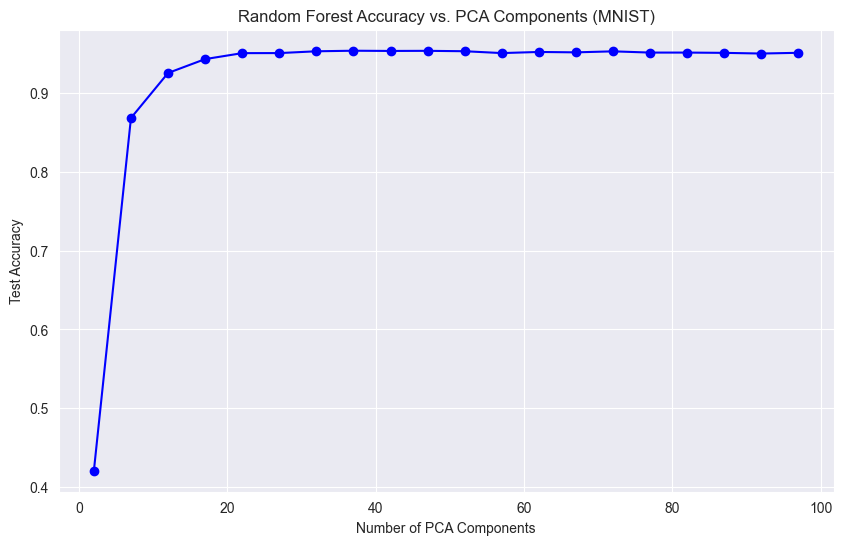


Optimal number of components: 37 (Accuracy: 0.9539)


In [26]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist.data, mnist.target.astype(int)

X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_components_range = range(2, 101, 5)
accuracies = []

for n in n_components_range:

    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_train_pca, y_train)
    y_pred = rf.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"Components: {n:3d} | Accuracy: {acc:.4f}")


plt.figure(figsize=(10, 6))
plt.plot(n_components_range, accuracies, 'bo-')
plt.xlabel('Number of PCA Components')
plt.ylabel('Test Accuracy')
plt.title('Random Forest Accuracy vs. PCA Components (MNIST)')
plt.grid(True)
plt.show()

best_n = n_components_range[np.argmax(accuracies)]
print(f"\nOptimal number of components: {best_n} (Accuracy: {max(accuracies):.4f})")